In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme(style='darkgrid')

weekly = pd.read_csv("Weekly.csv")

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75% 

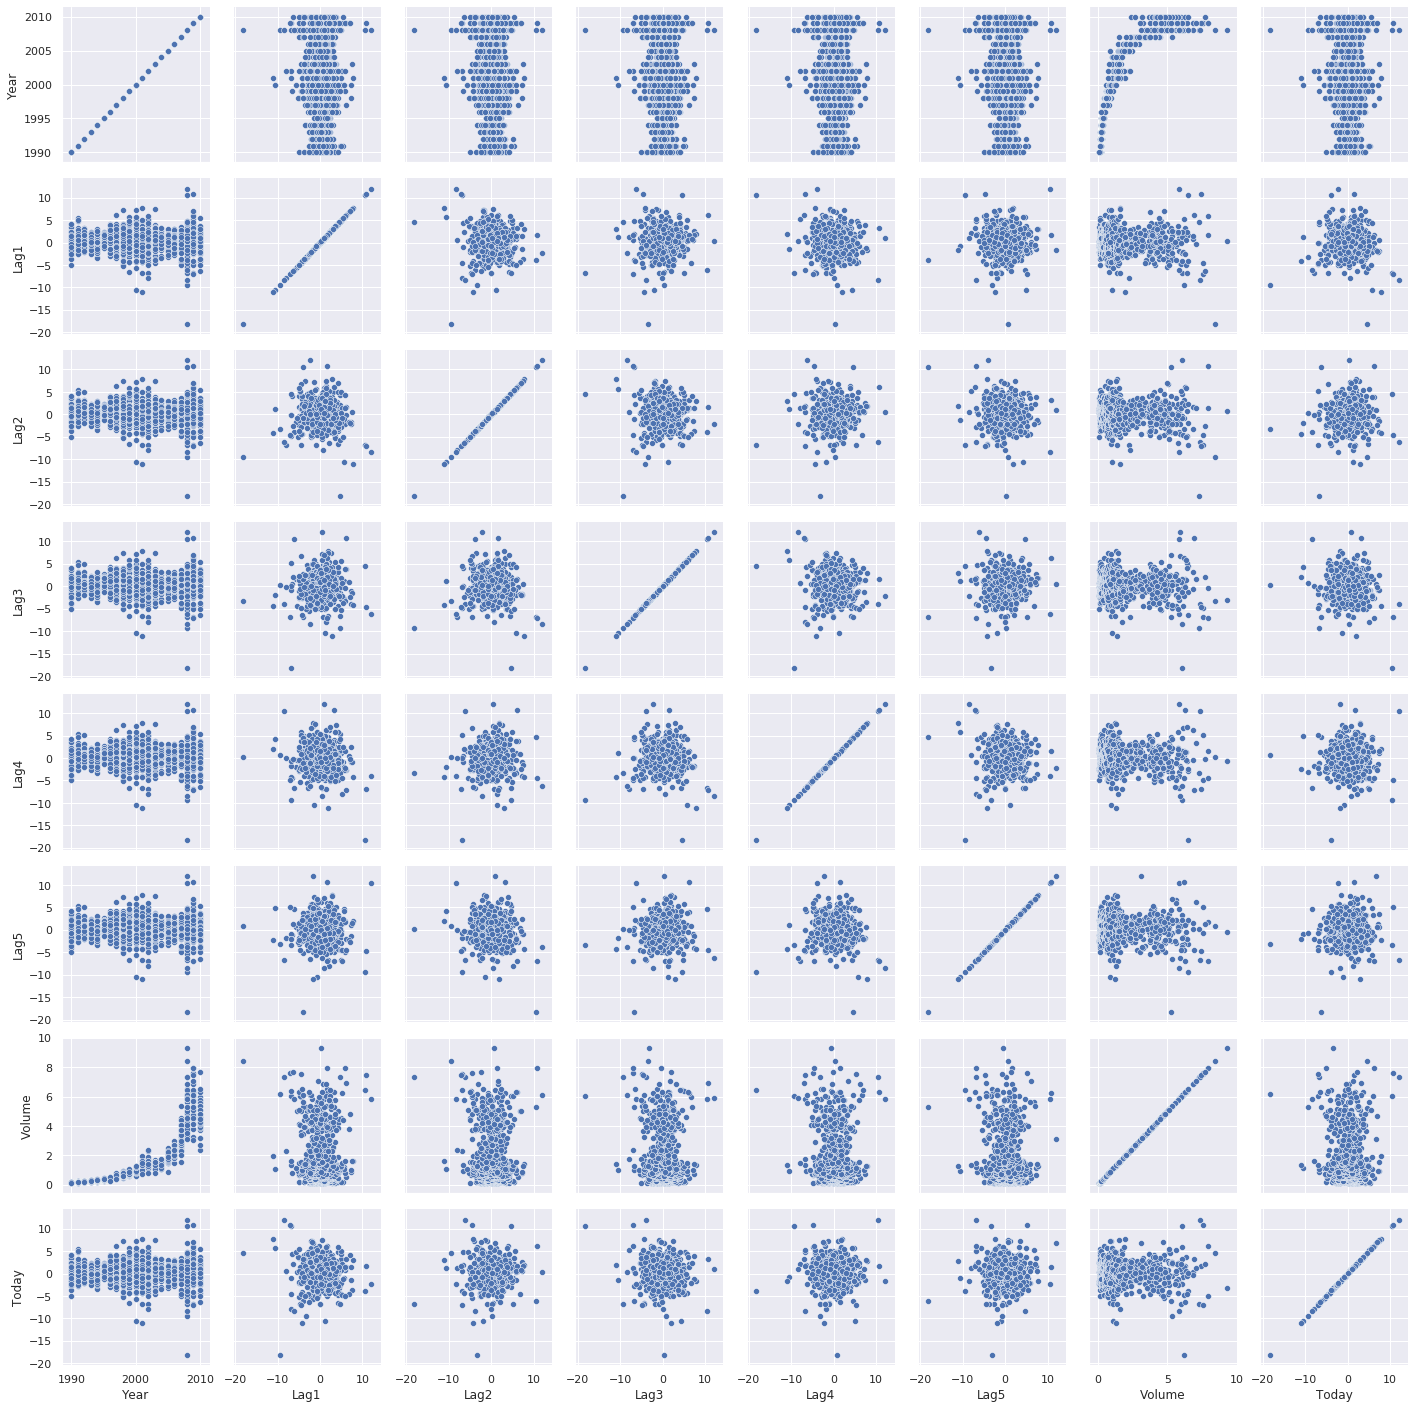

In [2]:
#a)
g = sns.PairGrid(weekly)
g.map(sns.scatterplot)
print(weekly.corr())

In [4]:
#b)
X = weekly.iloc[:,1:7]
y = weekly['Direction']
clf = LogisticRegression().fit(X,y)

In [5]:
#c)
y_pred = clf.predict(X)
confusion = confusion_matrix(y, y_pred)
print(confusion)

[[ 54 430]
 [ 48 557]]


In [10]:
#d)
weekly_ = weekly.copy()
weekly_ = weekly_.loc[weekly_['Year']<=2008]
A = weekly_[["Lag2"]]
b = weekly_["Direction"]
clf2 = LogisticRegression().fit(A, b)

weekly_2 = weekly.copy()
weekly_2 = weekly_2.loc[weekly_2['Year']> 2008]
C = weekly_2[['Lag2']]
d = weekly_2['Direction']
d_pred = clf2.predict(C)
print(confusion_matrix(d, d_pred))

[[ 9 34]
 [ 5 56]]


In [7]:
#e)
lda = LinearDiscriminantAnalysis()
lda.fit(A,b)
d_pred_lda = lda.predict(C)
print(confusion_matrix(d, d_pred_lda))

[[ 9 34]
 [ 5 56]]


In [12]:
#f)
qda = QuadraticDiscriminantAnalysis()
qda.fit(A,b)
d_pred_qda = qda.predict(C)
print(confusion_matrix(d, d_pred_qda))

[[ 0 43]
 [ 0 61]]


In [13]:
#g)
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(A,b)
d_pred_neigh = neigh.predict(C)
print(confusion_matrix(d, d_pred_neigh))

[[21 22]
 [31 30]]


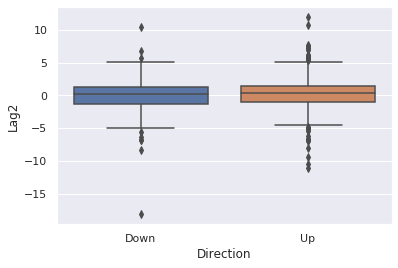

In [15]:
#i)
f = sns.boxplot(data=weekly, y='Lag2', x='Direction')